In [2]:
# spacy installation for data preprocessing
!pip install -U spacy 
!pip install -U spacy-lookups-data

     |████████████████████████████████| 6.1 MB 53 kB/s eta 0:00:0128
  Attempting uninstall: spacy
    Found existing installation: spacy 3.2.3
    Uninstalling spacy-3.2.3:
      Successfully uninstalled spacy-3.2.3
  Using cached spacy_lookups_data-1.0.3-py2.py3-none-any.whl (98.5 MB)
     |████████████████████████████████| 97.3 MB 16 kB/s eta 0:00:017


# Pytorch

In [1]:
!pip install torch

  Using cached torch-1.11.0-cp39-cp39-manylinux1_x86_64.whl (750.6 MB)
ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    torch from https://files.pythonhosted.org/packages/f8/04/ebf936e02d37c185341558de73324c6511d7fb7578cb1c3439411475fd7e/torch-1.11.0-cp39-cp39-manylinux1_x86_64.whl#sha256=58c7814502b1c129a650d7092033bbb0bbd64faf1a7941631aaa1aeaddc37570:
        Expected sha256 58c7814502b1c129a650d7092033bbb0bbd64faf1a7941631aaa1aeaddc37570
             Got        e3a49f7ce79a548ba12021287cfe4490c1af2397fd9737b658bf416afea36943



In [1]:
!pip install torchensemble

     |████████████████████████████████| 40 kB 2.2 MB/s  eta 0:00:01


In [4]:
!pip3 install torch==1.11.0+cpu torchvision==0.12.0+cpu torchaudio==0.11.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
     |████████████████████████████████| 169.2 MB 4.1 kB/s eta 0:00:01    |███▋                            | 19.2 MB 769 kB/s eta 0:03:15
     |████████████████████████████████| 14.7 MB 22 kB/s  eta 0:00:01
     |████████████████████████████████| 2.7 MB 657 kB/s eta 0:00:01


In [5]:
import torch

In [7]:
torch.tensor([1,2,3]) # creating a tensor

tensor([1, 2, 3])

In [8]:
_ * 2

tensor([2, 4, 6])

In [11]:
x = torch.randn(1,10)
prev_h = torch.randn(1,20)

W_h = torch.randn(20,20)
W_x = torch.randn(20,10)
W_h.requires_grad = True
W_x.requires_grad = True

i2h = torch.mm(W_x,x.t())
h2h = torch.mm(W_h,prev_h.t())

next_h = i2h + h2h
next_h - next_h.tanh()

next_h.backward(torch.ones(20,1))

In [ ]:
# 



# BagOfWords - Feed Forward 1

In [5]:
import pandas as pd
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm,tqdm_notebook

In [9]:
# DATA_SET = './datasets/aclimdb.csv'
DATA_SET = './datasets/IMDBDataset.csv'
test =pd.read_csv(DATA_SET).sample(5)
test

,review,sentiment
25503,Yet another early film from Alfred Hitchcock w...,negative
16608,TYSON <br /><br />Aspect ratio: 1.33:1<br /><b...,negative
12923,It started out slow after an excellent animate...,positive
1954,When Jim Wynorski first announced he would be ...,negative
23293,"A trio of low-life criminals, led by Matt Dill...",negative


In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
sentiment_label = le.fit_transform(test["sentiment"])
print(le.classes_)
test_new =test.drop("sentiment",axis="columns")
test_new["sentiment"] = sentiment_label
test_new
# negative - 0 , positive - 1

['negative' 'positive']


,review,sentiment
25503,Yet another early film from Alfred Hitchcock w...,0
16608,TYSON <br /><br />Aspect ratio: 1.33:1<br /><b...,0
12923,It started out slow after an excellent animate...,1
1954,When Jim Wynorski first announced he would be ...,0
23293,"A trio of low-life criminals, led by Matt Dill...",0


In [34]:
test_vectorizer = CountVectorizer(stop_words='english', max_df = 0.99 , min_df = 0.005)
test_seq = test_vectorizer.fit_transform(test_new['review'].tolist())
print(test_seq)


  (0, 148)	1
  (0, 22)	1
  (0, 257)	2
  (0, 110)	1
  (0, 362)	1
  (0, 287)	1
  (0, 382)	1
  (0, 519)	1
  (0, 310)	1
  (0, 341)	2
  (0, 509)	1
  (0, 116)	1
  (0, 504)	1
  (0, 442)	1
  (0, 214)	2
  (0, 156)	2
  (0, 582)	1
  (0, 323)	1
  (0, 114)	3
  (0, 101)	1
  (0, 337)	1
  (0, 120)	1
  (0, 409)	1
  (0, 523)	1
  (0, 322)	1
  :	:
  (4, 543)	1
  (4, 6)	1
  (4, 256)	1
  (4, 491)	1
  (4, 9)	1
  (4, 515)	1
  (4, 192)	1
  (4, 147)	1
  (4, 218)	1
  (4, 478)	1
  (4, 555)	1
  (4, 340)	1
  (4, 157)	1
  (4, 560)	1
  (4, 564)	1
  (4, 507)	1
  (4, 433)	1
  (4, 33)	1
  (4, 159)	1
  (4, 21)	1
  (4, 104)	1
  (4, 503)	1
  (4, 227)	1
  (4, 125)	1
  (4, 246)	1


In [25]:
class Sequences(Dataset):
    def __init__(self,path):
        df = pd.read_csv(path)
        le = preprocessing.LabelEncoder()
        sentiment_labels = le.fit_transform(df["sentiment"])
        #print(le.classes_)
        df =df.drop("sentiment",axis="columns")
        df["sentiment"] = sentiment_labels

        self.vectorizer = CountVectorizer(stop_words='english', max_df = 0.99 , min_df = 0.005)
        self.sequences = self.vectorizer.fit_transform(df.review.tolist())
        self.labels = df.sentiment.tolist()
        self.token2idx = self.vectorizer.vocabulary_
        self.idx2token = {idx: token for token , idx in self.token2idx.items()}
    def __getitem_(self,i):
        return self.sequences[i, :].toarray(), self.labels[i]
    def __len__(self):
        return self.sequences.shape[0]        

In [31]:
trial_db = Sequences(DATA_SET)
# train_loader = DataLoader(test_db, batch_size = 4096)
print(trial_db.vectorizer)
# print(trial_db.sequences)
print(trial_db.token2idx)


CountVectorizer(max_df=0.99, min_df=0.005, stop_words='english')
{'reviewers': 2114, 'mentioned': 1628, 'watching': 2800, 'just': 1398, 'episode': 831, 'll': 1517, 'hooked': 1240, 'right': 2122, 'exactly': 857, 'happened': 1167, 'br': 304, 'thing': 2583, 'struck': 2447, 'scenes': 2192, 'violence': 2759, 'set': 2247, 'word': 2857, 'trust': 2663, 'hearted': 1193, 'pulls': 1990, 'drugs': 763, 'sex': 2252, 'classic': 447, 'use': 2720, 'called': 347, 'given': 1092, 'security': 2218, 'state': 2401, 'focuses': 1008, 'mainly': 1566, 'city': 442, 'section': 2217, 'prison': 1950, 'glass': 1096, 'face': 902, 'high': 1213, 'em': 795, 'home': 1236, 'irish': 1349, 'death': 632, 'far': 932, 'away': 210, 'say': 2181, 'main': 1565, 'appeal': 148, 'fact': 906, 'goes': 1100, 'shows': 2283, 'wouldn': 2870, 'dare': 614, 'forget': 1026, 'pretty': 1940, 'pictures': 1871, 'mainstream': 1567, 'audiences': 200, 'charm': 409, 'romance': 2144, 'doesn': 725, 'mess': 1631, 'saw': 2180, 'nasty': 1712, 'surreal': 251

In [32]:
print(trial_db.idx2token)

{2114: 'reviewers', 1628: 'mentioned', 2800: 'watching', 1398: 'just', 831: 'episode', 1517: 'll', 1240: 'hooked', 2122: 'right', 857: 'exactly', 1167: 'happened', 304: 'br', 2583: 'thing', 2447: 'struck', 2192: 'scenes', 2759: 'violence', 2247: 'set', 2857: 'word', 2663: 'trust', 1193: 'hearted', 1990: 'pulls', 763: 'drugs', 2252: 'sex', 447: 'classic', 2720: 'use', 347: 'called', 1092: 'given', 2218: 'security', 2401: 'state', 1008: 'focuses', 1566: 'mainly', 442: 'city', 2217: 'section', 1950: 'prison', 1096: 'glass', 902: 'face', 1213: 'high', 795: 'em', 1236: 'home', 1349: 'irish', 632: 'death', 932: 'far', 210: 'away', 2181: 'say', 1565: 'main', 148: 'appeal', 906: 'fact', 1100: 'goes', 2283: 'shows', 2870: 'wouldn', 614: 'dare', 1026: 'forget', 1940: 'pretty', 1871: 'pictures', 1567: 'mainstream', 200: 'audiences', 409: 'charm', 2144: 'romance', 725: 'doesn', 1631: 'mess', 2180: 'saw', 1712: 'nasty', 2510: 'surreal', 550: 'couldn', 2032: 'ready', 2799: 'watched', 680: 'developed

# WordEmbeddings - Feed Forward 2
- add lstm model to show word embeddings graphically

# RNN --> LSTM --> GRU

# Stacking 

In [2]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)

In [3]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
# remove redundant features from x variables 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train,y_test = train_test_split(X,
                                                  y,
                                                  stratify=y, # ratio between pos , neg classes will be maintained
                                                  test_size=0.2,
                                                  random_state=42)


In [6]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [7]:
#classification models building : 

from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [10]:
#KNN : K nearest neighbors 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # 3 classes
knn.fit(X_train,y_train)

#make predictions 
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


#Train set performance 
knn_train_accuracy = accuracy_score(y_train,y_train_pred)
knn_train_mcc = matthews_corrcoef(y_train,y_train_pred)
knn_train_f1 = f1_score(y_train,y_train_pred,average="weighted")


#Test set performance
knn_test_accuracy = accuracy_score(y_test,y_test_pred)
knn_test_mcc = matthews_corrcoef(y_test,y_test_pred)
knn_test_f1 = f1_score(y_test,y_test_pred,average="weighted")


#knn train accuracies : 
print("KNN : train accuracies")
print ("accuracy %s" % knn_train_accuracy)
print("matthews corr coef : %s" %knn_train_mcc)
print("f1 score : %s" %knn_train_f1)

#knn test accuracies:
print("KNN : test accuracies")
print ("accuracy %s" % knn_test_accuracy)
print("matthews corr coef : %s" %knn_test_mcc)
print("f1 score : %s" %knn_test_f1)


KNN : train accuracies
accuracy 0.9583333333333334
matthews corr coef : 0.9375976715114386
f1 score : 0.9583268218992551
KNN : test accuracies
accuracy 1.0
matthews corr coef : 1.0
f1 score : 1.0


In [12]:
# predictions are classes : 
print(y_train_pred)
print(y_test_pred)

[0 1 1 0 1 2 1 1 2 2 2 1 1 1 1 0 0 2 2 0 2 0 2 0 1 2 2 0 2 0 0 1 1 0 2 2 1
 1 2 1 0 1 0 2 0 0 2 0 0 0 0 1 2 1 0 2 1 2 0 2 0 1 2 0 2 1 2 1 1 2 0 0 0 1
 1 2 1 2 2 1 0 2 1 0 2 0 2 1 1 0 1 2 0 0 2 2 2 1 2 0 2 1 2 2 0 1 1 1 1 1 0
 2 1 1 0 0 0 0 1 0]
[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


In [13]:
# svm radial basis kernel function ) 

from sklearn.svm import SVC

svm_rbf = SVC(gamma=2, C=1)
svm_rbf = svm_rbf.fit(X_train,y_train)

#make predictions : 
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

#training set performance
#Train set performance 
svm_rbf_train_accuracy = accuracy_score(y_train,y_train_pred)
svm_rbf_train_mcc = matthews_corrcoef(y_train,y_train_pred)
svm_rbf_train_f1 = f1_score(y_train,y_train_pred,average="weighted")


#Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test,y_test_pred)
svm_rbf_test_mcc = matthews_corrcoef(y_test,y_test_pred)
svm_rbf_test_f1 = f1_score(y_test,y_test_pred,average="weighted")

#svm rbf train accuracies : 
print("svm_rbf : train accuracies")
print ("accuracy %s" % svm_rbf_train_accuracy)
print("matthews corr coef : %s" %svm_rbf_train_mcc)
print("f1 score : %s" %svm_rbf_train_f1)

#svm rbf test accuracies:
print("svm_rbf : test accuracies")
print ("accuracy %s" % svm_rbf_test_accuracy)
print("matthews corr coef : %s" %svm_rbf_test_mcc)
print("f1 score : %s" %svm_rbf_test_f1)




svm_rbf : train accuracies
accuracy 0.9916666666666667
matthews corr coef : 0.9876028806587153
f1 score : 0.9916653643798509
svm_rbf : test accuracies
accuracy 0.9666666666666667
matthews corr coef : 0.9515873026942034
f1 score : 0.9665831244778613


In [17]:
# stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression # meta lerner



estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf)
]

#build stack model 
stack_model = StackingClassifier(
    estimators = estimator_list, final_estimator = LogisticRegression()
)

#train stacked model 
stack_model.fit(X_train,y_train)

#make predictions
y_train_pred = stack_model.predict(X_train)
y_tess_pred = stack_model.predict(X_test)

#training set model performance
#Train set performance 
stack_model_train_accuracy = accuracy_score(y_train,y_train_pred)
stack_model_train_mcc = matthews_corrcoef(y_train,y_train_pred)
stack_model_train_f1 = f1_score(y_train,y_train_pred,average="weighted")


#Test set performance
stack_model_test_accuracy = accuracy_score(y_test,y_test_pred)
stack_model_test_mcc = matthews_corrcoef(y_test,y_test_pred)
stack_model_test_f1 = f1_score(y_test,y_test_pred,average="weighted")

#stacking model train accuracies : 
print("stack_model : train accuracies")
print ("accuracy %s" % stack_model_train_accuracy)
print("matthews corr coef : %s" %stack_model_train_mcc)
print("f1 score : %s" %stack_model_train_f1)

#stacking model test accuracies:
print("stack_model : test accuracies")
print ("accuracy %s" % stack_model_test_accuracy)
print("matthews corr coef : %s" %stack_model_test_mcc)
print("f1 score : %s" %stack_model_test_f1)

stack_model : train accuracies
accuracy 0.9916666666666667
matthews corr coef : 0.9876028806587153
f1 score : 0.9916653643798509
stack_model : test accuracies
accuracy 0.9666666666666667
matthews corr coef : 0.9515873026942034
f1 score : 0.9665831244778613


In [19]:
acc_train_list = {
    'knn': knn_train_accuracy,
    'svm_rbf':svm_rbf_train_accuracy,
    'stack':stack_model_train_accuracy
}
acc_train_list

{'knn': 0.9583333333333334,
 'svm_rbf': 0.9916666666666667,
 'stack': 0.9916666666666667}

In [21]:
mcc_train_list = {
    'knn':knn_train_mcc,
    'svm_rbf':svm_rbf_train_mcc,
    'stack':stack_model_train_mcc
}
mcc_train_list

{'knn': 0.9375976715114386,
 'svm_rbf': 0.9876028806587153,
 'stack': 0.9876028806587153}

In [22]:
f1_train_list = {
    'knn':knn_train_f1,
    'svm_rbf':svm_rbf_train_f1,
    'stack':stack_model_train_f1    
}
f1_train_list

{'knn': 0.9583268218992551,
 'svm_rbf': 0.9916653643798509,
 'stack': 0.9916653643798509}

In [23]:
acc_df = pd.DataFrame.from_dict(acc_train_list,orient="index",columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list,orient="index",columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list,orient="index",columns=['F1'])
stack_df = pd.concat([acc_df,mcc_df,f1_df],axis = 1)
stack_df

,Accuracy,MCC,F1
knn,0.958333,0.937598,0.958327
svm_rbf,0.991667,0.987603,0.991665
stack,0.991667,0.987603,0.991665


In [24]:
stack_df.to_csv('stack_results.csv')

In [ ]:
# stacking in PyTorch 
# https://ensemble-pytorch.readthedocs.io/en/latest/quick_start.html 
# https://ensemble-pytorch.readthedocs.io/en/latest/
from torchensemble import VotingClassifier




# Bagging , Boosting ,  Voting

## voting
- http://localhost:8888/notebooks/Downloads/voting-ensemle-main/voting-classifier-iris.ipynb 

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
voting_X , voting_y = load_iris(return_X_y = True)
v_X =pd.DataFrame(voting_X)
v_X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
v_y=pd.DataFrame(voting_y)
v_y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
v_df = pd.concat([v_X,v_y],axis=1)
v_df = v_df.set_axis(["0","1","2","3","4"],axis=1)
v_df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


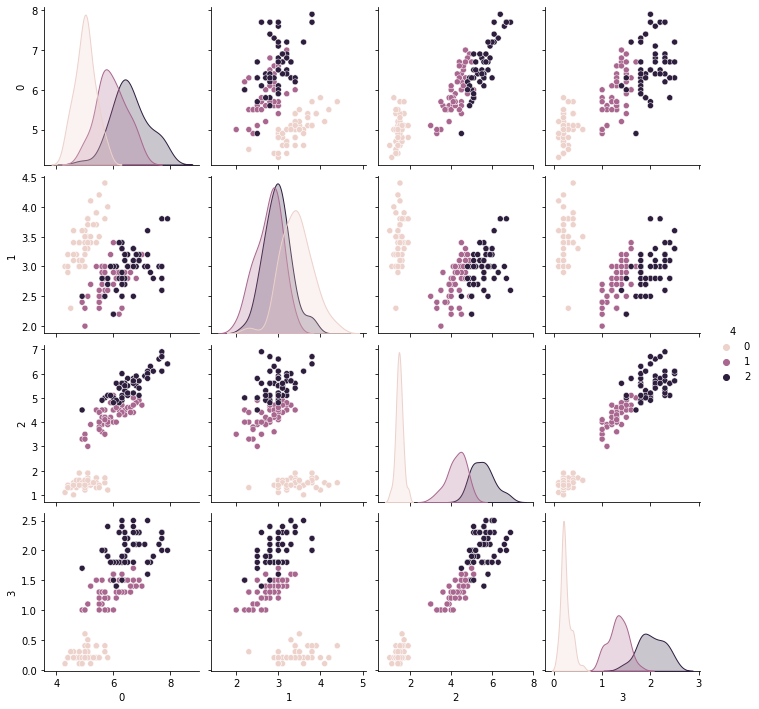

In [6]:
import seaborn as sns
sns.pairplot(v_df,hue='4')

# From RPS for publish2

# For submission 

# Models 
0. Preprocessing + Dataset(generic for training)
- BoW (TFIDF)
- Word Embedding
1. Naive Bayes
2. SVM 
3. Feed Forward 
4. RNN , LSTM , GRU

In [3]:
#0. Preprocessing + Dataset
import pandas as pd 
import numpy as np 

import spacy 
from spacy.lang.en.stop_words import STOP_WORDS



### Data sets:
KazAnova. (2017 September) . Sentiment140 dataset with 1.6 million tweets, Version 2. Retrieved 9 May 2021 from https://www.kaggle.com/kazanova/sentiment140 .
Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).https://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf

In [4]:
df_final_1 = pd.read_csv("/datasets/training.1600000.processed.noemoticon.csv",encoding='latin-1',header=None)
df_final_2

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/training.1600000.processed.noemoticon.csv'

In [ ]:
df_final.head()

In [ ]:
df_final = df_final[[5,0]]

In [ ]:
df_final.columns = ['tweets','sentiment_label']
df_final.head()

In [ ]:
df_final['sentiment_label'].value_counts()

In [ ]:
#1. Naive Bayes

In [ ]:
#2. SVM 

In [ ]:
#3. Feed Forward Bag Of Words Representation

In [ ]:
#4. Feed Forward Word Embeddings

In [ ]:
#5. RNN , LSTM , GRU

# Stacking of Models
- meta learner  : Logistic regression model 


In [ ]:
# stacking nb, svm
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression # meta lerner



estimator_list = [
    ('nb',knn),
    ('svm',svm_rbf),
#     ('feed_f_bow',feed_f_bow),
#     ('feed_f_worde',feed_f_worde),
#     ('rnn_lstm_gru',rnn_lstm_gru)
]

#build stack model 
stack_model = StackingClassifier(
    estimators = estimator_list, final_estimator = LogisticRegression()
)

#train stacked model 
stack_model.fit(X_train,y_train)

#make predictions
y_train_pred = stack_model.predict(X_train)
y_tess_pred = stack_model.predict(X_test)

#training set model performance
#Train set performance 
stack_model_train_accuracy = accuracy_score(y_train,y_train_pred)
stack_model_train_mcc = matthews_corrcoef(y_train,y_train_pred)
stack_model_train_f1 = f1_score(y_train,y_train_pred,average="weighted")


#Test set performance
stack_model_test_accuracy = accuracy_score(y_test,y_test_pred)
stack_model_test_mcc = matthews_corrcoef(y_test,y_test_pred)
stack_model_test_f1 = f1_score(y_test,y_test_pred,average="weighted")

#svm rbf train accuracies : 
print("stack_model : train accuracies")
print ("accuracy %s" % stack_model_train_accuracy)
print("matthews corr coef : %s" %stack_model_train_mcc)
print("f1 score : %s" %stack_model_train_f1)

#svm rbf test accuracies:
print("stack_model : test accuracies")
print ("accuracy %s" % stack_model_test_accuracy)
print("matthews corr coef : %s" %stack_model_test_mcc)
print("f1 score : %s" %stack_model_test_f1)

In [ ]:
# stacking feed_f_bow, feed_f_wordEmbedding , rnn_lstm_gru

# Testing on Actual Data from the Application

In [35]:
FILE_1 ="./datasets/databse-json/software-project-43397-default-rtdb-export.json" 
FILE_2 ="./datasets/databse-json/productivity-app-24ab3-default-rtdb-export.json"

df1 = pd.read_json(FILE_1)
df2 = pd.read_json(FILE_2)


In [49]:
import json 
from pandas.io.json import json_normalize
df1
# df1["Booking"][0]

,Booking,Ground,History,User
36f8582e-8e87-4f68-9548-2ebd6befed8b,{'1637826739': {'Badminton': {'06:00 - 08:00AM...,"{'gaddress': 'Block N, Panchsheel Park North, ...",NaN,NaN
447eab03-452e-4197-8c62-59f2d7ae3d43,{'1637826739': {'Cricket': {'06:00 - 08:00AM':...,"{'gaddress': '4th Main Rd, RA Puram, Govindasw...",NaN,NaN
451c9d99-0555-4d64-986c-e85e53972231,{'1637826739': {'Cricket': {'06:00 - 08:00AM':...,"{'gaddress': '12, Sardar Patel Rd, Anna Univer...",NaN,NaN
56402052-2dcc-4ccf-a4ce-60f6a725d4d0,{'1637826739': {'Badminton': {'06:00 - 08:00AM...,"{'gaddress': 'Link Road, Malad West, Mumbai-40...",NaN,NaN
6f08decc-7572-4659-b681-1e2b195427d9,{'1637826739': {'Badminton': {'04:00 - 06:00AM...,"{'gaddress': 'Azad Nagar - near Metro station,...",NaN,NaN
6f2f1287-2572-4ee8-9d50-a1a966b1792f,{'1637826739': {'Cricket': {'04:00 - 06:00AM':...,"{'gaddress': 'Sarvodaya Bal Vidyalaya, No 1, N...",NaN,NaN
8e0b8fc9-1f62-4ae9-8469-2af49bd44d86,{'1637826739': {'Cricket': {'07:00 - 09:00AM':...,"{'gaddress': '10, Alandur Rd, Industrial Area,...",NaN,NaN
9cf8bf5e-b3d5-48d7-b049-ca49ffeba144,{'1637826739': {'Badminton': {'06:00 - 08:00AM...,"{'gaddress': ' Arya Nagar, South Bombay, Mumba...",NaN,NaN
b661e992-a181-4476-b531-09260136c89b,{'1637826739': {'Football': {'05:00 - 07:00AM'...,"{'gaddress': 'No 1, Muthu Gramani St, Perumalp...",NaN,NaN
bd3a314f7-7e7a-458f-b608-1057b38232da,{'1637826739': {'Football': {'05:00 - 07:00AM'...,NaN,NaN,NaN


In [51]:
df1.to_csv("./datasets/try1.csv")

In [50]:
try1_df1 = json_normalize(df1["Booking"], record_path = ['Badminton'])
try1_df1.head()

/tmp/ipykernel_3759/107203546.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  try1_df1 = json_normalize(df1["Booking"], record_path = ['Badminton'])


KeyError: "Key 'Badminton' not found. If specifying a record_path, all elements of data should have the path."

In [37]:
df2

,Room,Users
BNQbSkCFiVbNsLobZyvhiNqVUX12,"{'friends': 'null', 'uid': 'BNQbSkCFiVbNsLobZy...","{'email': 'playstorecnx1992@gmail.com', 'fcm':..."
DDlqyngiKSVo45wCrYicEchDDhl1,{'friends': {'pLOrRdvpJENuiQc2asDb1j9nN9K2': {...,"{'email': 'jain.khushee05@gmail.com', 'fcm': '..."
FLsB7l7NSgYOXPtfighgyKu9iVm1,"{'friends': 'null', 'uid': 'FLsB7l7NSgYOXPtfig...","{'email': 'guptaabhinav2205@gmail.com', 'fcm':..."
FuDCdDBN1zRJCIwIqtNvKGuVGyT2,"{'friends': 'null', 'uid': 'FuDCdDBN1zRJCIwIqt...","{'email': 'agg.raghav.info@gmail.com', 'fcm': ..."
M9k6ZTTD6BRcZECDPdTXJNGaI443,"{'friends': 'null', 'uid': 'M9k6ZTTD6BRcZECDPd...","{'email': 'samikhanin2000@gmail.com', 'fcm': '..."
pLOrRdvpJENuiQc2asDb1j9nN9K2,{'friends': {'DDlqyngiKSVo45wCrYicEchDDhl1': {...,"{'email': 'panshuljindal@gmail.com', 'fcm': 'n..."
pYPF6A1887fIydiqQeBdpqjqiHr1,"{'friends': 'null', 'uid': 'pYPF6A1887fIydiqQe...","{'email': 'dharmendra16@gmail.com', 'fcm': 'nu..."
